In [4]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [7]:
def night_day(img_name):
    img = Image.open(img_name)
    im_np = np.asarray(img)
    height, width = im_np.shape[0], im_np.shape[1]
    gray_image = im_np.dot([0.299,0.587,0.144])
    # print(gray_image.shape)
    total = gray_image.shape[0]*gray_image.shape[1]
    black = (gray_image < 50).sum()
    if black > total/2 :
        # print(img_name)
        return 'Night'
    return 'Day'

In [2]:
images = os.listdir(r'images/')

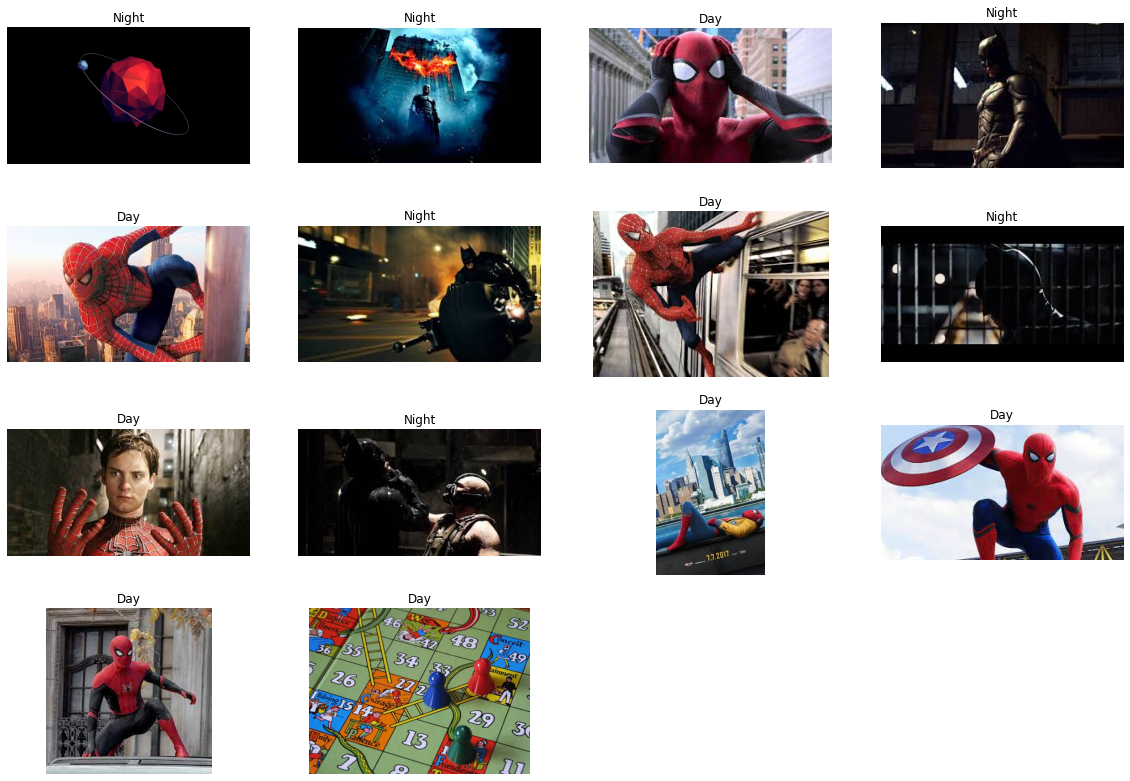

In [10]:
fig = plt.figure(figsize=(20, 14))
for i,img in enumerate(images):
    fig.add_subplot(4, 4, i+1)
    im = plt.imread(f'images/{img}')
    plt.imshow(im)
    plt.axis('off')
    mode = night_day(f'images/{img}')
    plt.title(mode)
    

In [33]:
night  = os.listdir(r'night')
day = os.listdir(r'day')

In [49]:
def get_dists(folder):
    images = os.listdir(folder)
    value_dist = np.zeros(20)
    for img_name in images:
        path = f'{folder}/{img_name}'
        img = Image.open(path)
        im_np = np.asarray(img)
        gray_image = im_np.dot([0.299,0.587,0.144])
        start = 0
        for i in range(20):
            # dist = (gray_image < start+20).sum()
            value_dist[i] += ((start < gray_image) & (gray_image < start+13)).sum()
            start += 13
    return value_dist

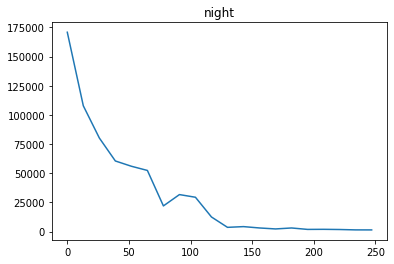

In [51]:
x = range(0,260,13)
plt.title('night')
plt.plot(x,get_dists(r'night'))

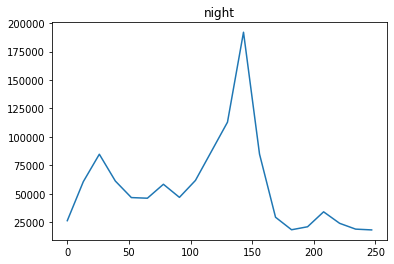

In [52]:
x = range(0,260,13)
plt.title('night')
plt.plot(x,get_dists(r'day'))